 # Regresión logística para predicciones en las campañas de promociones

In [3]:
%%html
<img src="https://i.pinimg.com/236x/e7/5c/1e/e75c1ec594afe6dcf9cd0a8d9e5fb9ed.jpg">

In [4]:
!pip install imblearn -i https://artifactory.apps.bancolombia.com/api/pypi/pypi-bancolombia/simple --trusted-host artifactory.apps.bancolombia.com!pip install imblearn

Looking in indexes: https://artifactory.apps.bancolombia.com/api/pypi/pypi-bancolombia/simple
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\ducatano\\AppData\\Local\\Temp\\pip-uninstall-mkvkuug1\\users\\ducatano\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\sklearn\\linear_model\\cd_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
import pandas as pd
import numpy as np
import os
##graficos
import matplotlib.pyplot as plt
#Seaborn es una biblioteca para hacer gráficos estadísticos en Python
import seaborn as sns
#biblioteca para dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Libreria para hacer la regresión logística
from sklearn.linear_model import LogisticRegression
#Puede configurar muchas más cosas en rcParams, como el peso predeterminado de la etiqueta, etc.
from pylab import rcParams
#balancear la muestra con el método SMOTE
from imblearn.combine import SMOTETomek
#metricas de precisión del modelo
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score 
#El paquete sklearn.datasets incluye algunos pequeños conjuntos de datos 
from sklearn import datasets

ModuleNotFoundError: No module named 'imblearn'

In [2]:
mainpath= "C:/Users/ducatano/Desktop/Curso de Python Bancolombia"
filename= "Promos2.csv"
fullpath= os.path.join(mainpath,filename)
#Cargar los datos. 
data= pd.read_csv(fullpath, sep=";")
data.head()


,age,job,marital,education,default,credit,prestamo,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,r,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'credit',
       'prestamo', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'r', 'nr.employed', 'y'],
      dtype=object)

In [6]:
#Cambiar el tipo de la variables dependiente (y) yes=1 y no=0
data["y"] = (data["y"]=="yes").astype(int)

In [7]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
#Homgenizar basic.9y, basic.6y, university.degree= Basic
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])
#Poner letra inicial en mayuscula high.school=High School, professional.course=Professional Course, university.degree=University Degree
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
#Poner letra inicial en mayuscula illiterate=Illiterate, unknown=Unknown
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [10]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
#Obtener la media de cada una de las variables según los tipos de clientes 
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,r,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


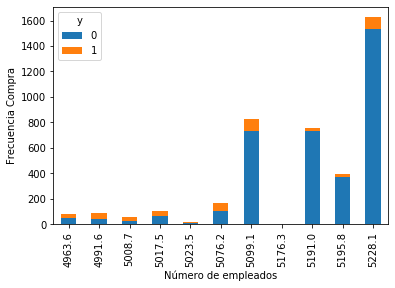

In [12]:
# Gráfico de barras apiladas (stacked) con grupo de dos niveles
data.groupby(['nr.employed','y']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel("Número de empleados")
plt.ylabel("Frecuencia Compra")
plt.show()

In [13]:
#Obtener la media de cada una de las variables según la educación 
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,r,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

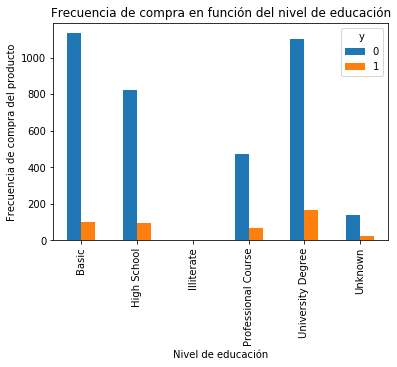

In [14]:
#La siguiente instrucción permite incorporar las gráficas en este documento 
#(sin que se abra una nueva ventana para cada gráfica)
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

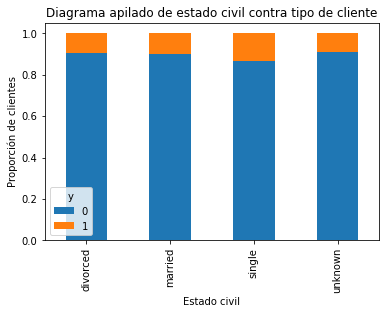

In [15]:
#Diagrama apilado de estado civil contra tipo de cliente
#axis=0 filas 
#stacked=apilado
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra tipo de cliente")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

In [16]:
table=pd.crosstab(data.marital, data.y).apply(lambda r: r/r.sum(), axis=0)
table

y,0,1
marital,,
divorced,0.109869,0.095344
married,0.615322,0.558758
single,0.272083,0.343681
unknown,0.002726,0.002217


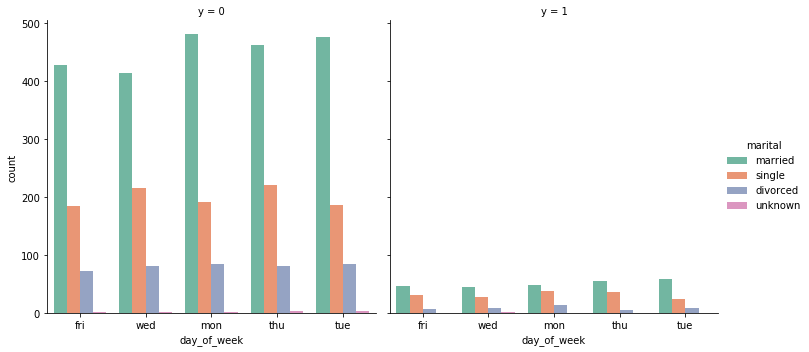

In [17]:
# Grafico de barras por tipo de clientes según dia de la semana que compra y estado civil
g = sns.catplot(x="day_of_week",  hue="marital", col="y",
                data=data, kind="count",
                  palette="Set2");

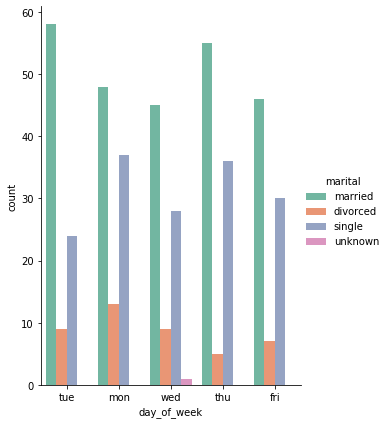

In [18]:
d1=data.loc[data['y'] == 1]
d1
g = sns.catplot(x="day_of_week",  hue="marital",
                data=d1, kind="count",
                 height=6, aspect=.7, palette="Set2");

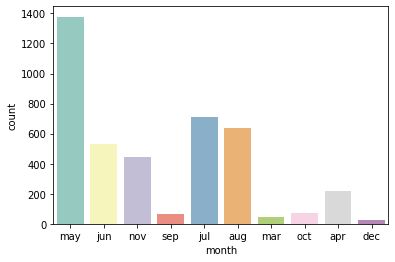

In [19]:
#Mes donde se hace el mayor número de compras
sns.countplot(data['month'],label="Sum",palette="Set3")
plt.show()

Text(0, 0.5, 'Frecuencia de compra del producto')

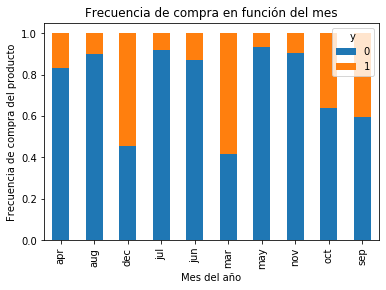

In [20]:
%matplotlib inline
table= pd.crosstab(data.month, data.y)
table.div(table.sum(1), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

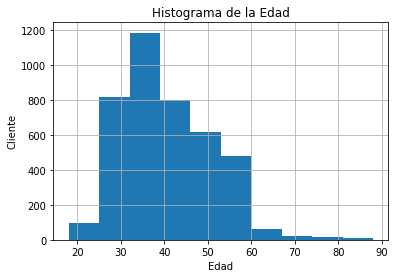

In [21]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

### Missing Data

In [22]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
y,0,0.0
day_of_week,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0


## Modelo de Regresión Logistica

### Conversión de las variables categóricas a dummies

In [23]:
cate = ["job", "marital", "education","credit", "default","contact", "prestamo",
              "month", "day_of_week", "poutcome"]
for categoria in cate:
    cat_list = "tu"+ "_"+categoria
    cat_dummies = pd.get_dummies(data[categoria], prefix=categoria)
    data_new = data.join(cat_dummies)
    data = data_new       

In [24]:
data.head()

,age,job,marital,education,default,credit,prestamo,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [25]:
#Listas de variables con dummies incluídas
data_var = data.columns.values.tolist()
data_var

['age',
 'job',
 'marital',
 'education',
 'default',
 'credit',
 'prestamo',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'r',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'credit_no',
 'credit_unknown',
 'credit_yes',
 'default_no',
 'default_unknown',
 'default_yes',
 'contact_cellular',
 'contact_telephone',
 'prestamo_no',
 'prestamo_unknown',
 'prestamo_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'm

In [26]:
#Guardar solo las dummies sin las columnas originales
to_keep = [i for i in data_var if i not in cate]
to_keep = [i for i in to_keep if i not in ["default"]]

In [27]:
#Guardar la data solo con las dummies
promo_data = data[to_keep]
promo_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'r', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'credit_no',
       'credit_unknown', 'credit_yes', 'default_no', 'default_unknown',
       'default_yes', 'contact_cellular', 'contact_telephone',
       'prestamo_no', 'prestamo_unknown', 'prestamo_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_we

In [28]:
promo_data['marital_divorced'].unique()

array([0, 1], dtype=uint64)

In [29]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

## Remuestreo usando SMOTE

SMOTE algorithm(Synthetic Minority Oversampling Technique)

Se debe instalar el paquete imblearn:

```
conda install -c conda-forge imbalanced-learn
```


In [33]:
!pip install imblearn

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
X = promo_data.loc[:, promo_data.columns != 'y']
y = promo_data.loc[:, promo_data.columns == 'y']
### Algoritmo de balanceo de datos
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
## Particionamiento de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

## Aplicando el balanceo de datos, solo a la data de entrenamiento
os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  5108
Number of no subscription in oversampled data 2554
Number of subscription 2554
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Selección de rasgos para el modelo

In [36]:
#Datos finales
data_final_vars=promo_data.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

Antes de implementar el modelo, realicemos una selección de características para decidir las variables significativas 
que pueden predecir el resultado con gran precisión. Tenemos la libertad de seleccionar tantas variables como podamos.
Seleccionemos 14 columnas.Esto se puede hacer de la siguiente manera, que es similar a la realizada en el capítulo sobre
regresión lineal:

In [37]:
from sklearn.feature_selection import RFE

In [38]:
lrs = LogisticRegression(solver='liblinear')
rfe = RFE(lrs, 14)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False False False False False
 False False  True False  True False  True False False  True False False
 False  True False False  True False False False False False False False
 False False False False False  True False False False  True False False
  True  True  True False False False False False False False  True False
  True]
[41 45 32 47  1  2 30 29 15 42 20 31 11 38  1 34  1  8  1 22 21  1 14 13
 12  1 40 43  1  4  5 28 39  3 19 27 25 48 24 10 37  1 23 46 16  1  7  9
  1  1  1 33  6 44 35 36 18 17  1 26  1]


Las columnas que se seleccionan con este método son las siguientes:

In [39]:
z=zip(data_final_vars,rfe.support_, rfe.ranking_)

A continuación, intentaremos ajustar un modelo de regresión logística utilizando las variables seleccionadas anteriores como variables predictoras, con la y como la variable de resultado:

In [40]:
promo_data_vars = promo_data.columns.values.tolist()
Y = ['y']
X = [v for v in promo_data_vars if v not in Y]

In [41]:
os_data_X.columns[rfe.support_]

Index(['previous', 'job_management', 'job_self-employed', 'job_student',
       'job_unknown', 'marital_unknown', 'education_Illiterate',
       'prestamo_unknown', 'month_dec', 'month_mar', 'month_may', 'month_nov',
       'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [42]:
cols=['education_Basic', 'education_High School',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'credit_no', 'credit_unknown', 'credit_yes',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_success']
X=os_data_X[cols]
y=os_data_y['y']

## Implementación del modelo

Primero usemos el método stasmodel.api para ejecutar el modelo de regresión logística como se 
muestra en el siguiente fragmento de código:

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
# logit_model = sm.Logit(y, X)

In [ ]:
lr = LogisticRegression(solver='liblinear')

In [ ]:
cols=['education_Basic', 'education_High School',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'credit_no', 'credit_yes',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_success'] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Si observas el coeficiente es positivo y es significativo lo cual puedes afirmar que a dicha variable mayor es la probabilidad de comprar en las ofertas.

## Ajuste de modelo de Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
recall = (685)/(91+685)
print(recall)

In [ ]:
X = promo_data.loc[:, promo_data.columns != 'y']
y = promo_data.loc[:, promo_data.columns == 'y']
import statsmodels.api as sm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
recall = (46)/(46+76)
print(recall)